In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gsw
import xarray as xr
import toolbox
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import matplotlib

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature

In [2]:
simulations = ['GRZE1Q', #A - 5e-8m frgtime 100
                '0W36KD', #B
                'QM2PXY', #C
                'KEMVZS'] #D

path = '/storage/shared/oceanparcels/output_data/data_Claudio/frag_runs/'

In [3]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r', n_colors=8)
cmap   = sns.mpl_palette('cmo.ice', n_colors=8, as_cmap=True)

In [4]:
names = ['A', 'B', 'C', 'D']
sim = {}
for i, j in enumerate(names):
    ds = xr.load_dataset(path + simulations[i] + '.nc')
    sim[names[i]] = toolbox.stuck_particles_mask(ds)

Text(0.5, 1.0, '$\\lambda_f = 100$ days. No $K_z$')

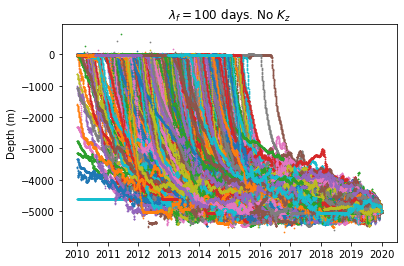

In [5]:
for i in range(1000):
    plt.scatter(sim['A']['time'][i], -sim['A']['z'][i], s=0.5);
    
plt.ylabel('Depth (m)')
plt.title(r'$\lambda_f = 100$ days. No $K_z$')

Text(0.5, 1.0, '$\\lambda_f = 10$ days. No $K_z$')

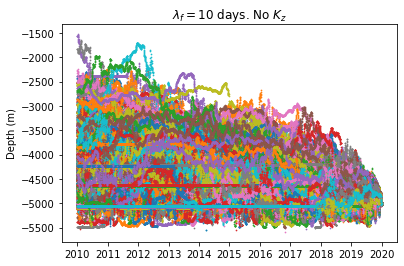

In [6]:
sim_name = 'B'

for i in range(1000):
    plt.scatter(sim[sim_name]['time'][i], -sim[sim_name]['z'][i], s=0.5);
    
plt.ylabel('Depth (m)')
plt.title(r'$\lambda_f = 10$ days. No $K_z$')

Text(0.5, 1.0, '$\\lambda_f = 1000$ days. No $K_z$')

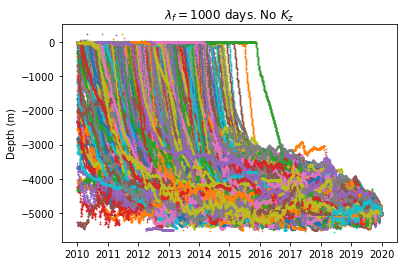

In [7]:
sim_name = 'C'

for i in range(1000):
    plt.scatter(sim[sim_name]['time'][i], -sim[sim_name]['z'][i], s=0.5);
    
plt.ylabel('Depth (m)')
plt.title(r'$\lambda_f = 1000$ days. No $K_z$')

Text(0.5, 1.0, '$\\lambda_f = 100$ days')

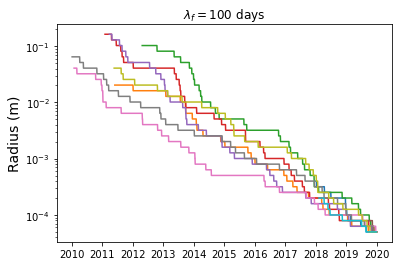

In [8]:
sim_name = 'A'

for i in range(10):
    plt.semilogy(sim[sim_name]['time'][i], sim[sim_name]['radius'][i]*1000);
    
plt.ylabel('Radius (m)', fontsize=14)
plt.title(r'$\lambda_f = 100$ days')

Text(0.5, 1.0, '$\\lambda_f = 10$ days. No $K_z$')

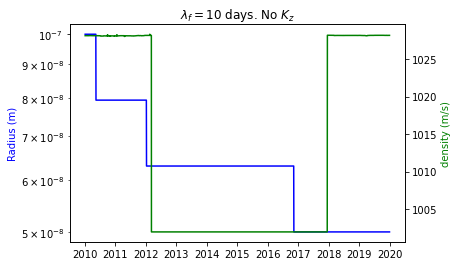

In [9]:
N = 420
sim_name = 'D'

fig,ax = plt.subplots()
ax.semilogy(sim[sim_name]['time'][N], sim[sim_name]['radius'][N], c='blue')
ax.set_ylabel('Radius (m)', color='blue')

# ax2 = ax.twinx()
# ax2.plot(sim[sim_name]['time'][N], sim[sim_name]['v_s'][N], c='red')
# ax2.set_ylabel('Sinking velocity (m/s)', color='red')

ax3 = ax.twinx()
ax3.plot(sim[sim_name]['time'][N], sim[sim_name]['density'][N], c='green')
ax3.set_ylabel('density (m/s)', color='green')

plt.title(r'$\lambda_f = 10$ days. No $K_z$')

[]

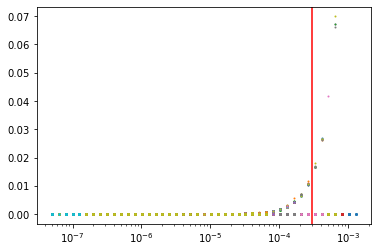

In [41]:
for i in range(1000):
    plt.scatter(sim[sim_name]['radius'][i], sim[sim_name]['v_s'][i], s=1)
    
plt.axvline(0.3e-3, c='red')
plt.semilogx()


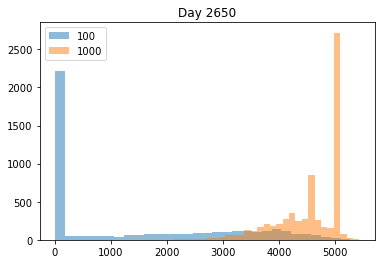

In [43]:
N=2650
# sim_name = 'A'
bins=30
plt.hist(sim['A']['z'][:, N],label='100', alpha=0.5, bins=bins)
#plt.hist(sim['B']['z'][:, N],label='10', alpha=0.5)
plt.hist(sim['C']['z'][:, N],label='1000', alpha=0.5, bins=bins)
# plt.hist(sim['D']['z'][:, N],label='100', alpha=0.5, bins=bins)
# #plt.hist(sim['B']['z'][:, N],label='10', alpha=0.5)
# plt.hist(sim['F']['z'][:, N],label='1000', alpha=0.5, bins=bins)
plt.title(f'Day {N}')
plt.legend()

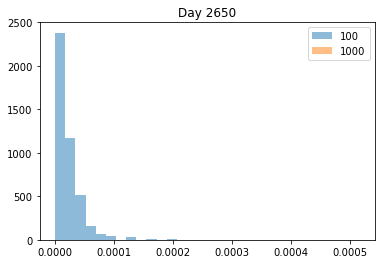

In [163]:
N=2650
# sim_name = 'A'
bins=30
plt.hist(sim['A']['radius'][:, N],label='100', alpha=0.5, bins=bins)
#plt.hist(sim['B']['z'][:, N],label='10', alpha=0.5)
plt.hist(sim['B']['radius'][:, N],label='1000', alpha=0.5, bins=bins)
# plt.hist(sim['D']['z'][:, N],label='100', alpha=0.5, bins=bins)
# #plt.hist(sim['B']['z'][:, N],label='10', alpha=0.5)
# plt.hist(sim['F']['z'][:, N],label='1000', alpha=0.5, bins=bins)
plt.title(f'Day {N}')
plt.legend()

In [44]:
a = toolbox.stuck_particles_mask(sim['A'])

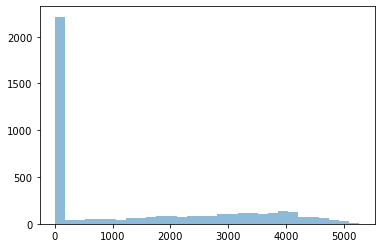

In [45]:
N=2650
# sim_name = 'A'
bins=30
plt.hist(a['z'][:, N],label='100', alpha=0.5, bins=bins);

Text(0.5, 1.0, '$\\lambda_f = 100$ days. No $K_z$')

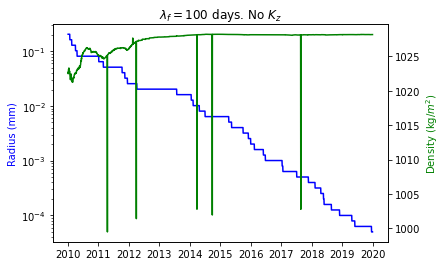

In [181]:
N = 550
sim_name = 'C'

fig,ax = plt.subplots()
ax.semilogy(sim[sim_name]['time'][N], sim[sim_name]['radius'][N]*1000, c='blue')
ax.set_ylabel('Radius (mm)', color='blue')

ax3 = ax.twinx()
ax3.plot(sim[sim_name]['time'][N], sim[sim_name]['density'][N], c='green')
ax3.set_ylabel('Density (kg/$m^2$)', color='green')

plt.title(r'$\lambda_f = 100$ days. No $K_z$')

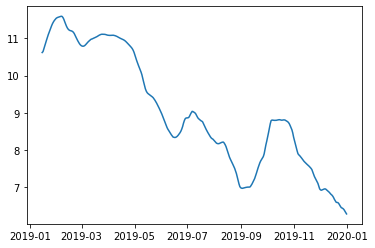

In [47]:
plt.plot(sim[sim_name]['time'][N], sim[sim_name]['lon'][N])

In [15]:
# you were about to compute the divergence

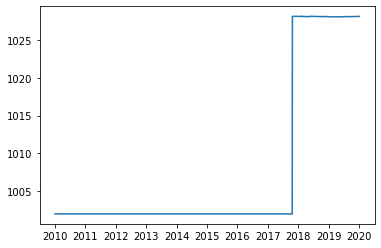

In [58]:
plt.plot(sim[sim_name]['time'][N], sim[sim_name]['density'][N])
plt.plot(sim[sim_name]['time'][N], sim[sim_name][''][N])

Text(0.5, 1.0, '-8 years with $\\lambda_f$ = 100 days')

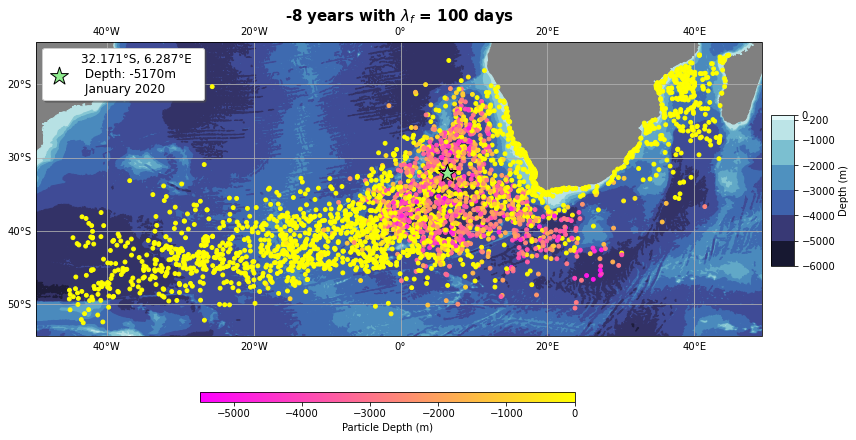

In [23]:
sim_name = 'A'
max_depth = -5500
min_depth = 0
nn = 8*365

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim[sim_name]['lon'][:,nn], sim[sim_name]['lat'][:,nn], zorder=4, 
           c=-sim[sim_name]['z'][:,nn], s=15, cmap='spring',
                vmax=max_depth, vmin=min_depth)

ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title(r'-8 years with $\lambda_f$ = 100 days', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

Text(0, 0.5, 'Depth (m)')

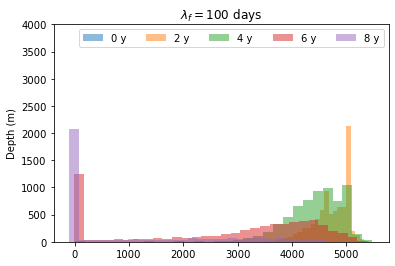

In [197]:
N=2650
# sim_name = 'A'
bins=30
for i in range(0, 10, 2):

    N = i*365
    
    plt.hist(sim['A']['z'][:, N],label=f'{i} y', alpha=0.5, bins=bins)

#     plt.hist(sim['A']['z'][:, N],label='2 y', alpha=0.5, bins=bins)
plt.title(f'$\lambda_f = 100$ days')
plt.legend(ncol=5)
plt.ylim(0, 4000)
plt.ylabel('Depth (m)')
# plt.semilogx()

In [10]:
inMLD_A = np.array(sim['A']['mld'] > sim['A']['z'])
inMLD_A = np.sum(inMLD_A, axis=0)

In [14]:
inMLD_B = np.array(sim['B']['mld'] > sim['B']['z'])
inMLD_B = np.sum(inMLD_B, axis=0)

In [15]:
time = np.linspace(0, 10, 3651)

In [16]:
A_nan = np.sum(np.isnan(sim['A']['z']),axis=0)
B_nan = np.sum(np.isnan(sim['B']['z']), axis=0)

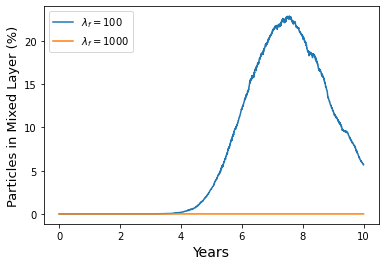

In [18]:
plt.plot(time, inMLD_A/100, label=r'$\lambda_f = 100$')
plt.plot(time, inMLD_B/100, label=r'$\lambda_f = 1000$')


plt.xlabel('Years', fontsize=14)
plt.ylabel('Particles in Mixed Layer (%)', fontsize=13)
plt.legend()

Text(0.5, 0, 'Years')

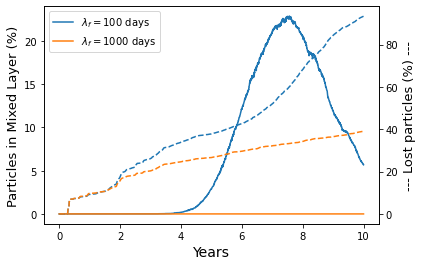

In [19]:
fig,ax = plt.subplots()
ax.plot(time, inMLD_A/100, label=r'$\lambda_f = 100$ days')
ax.plot(time, inMLD_B/100, label=r'$\lambda_f = 1000$ days')
ax.set_ylabel('Particles in Mixed Layer (%)', fontsize=13)
plt.legend()
ax2 = ax.twinx()
ax2.plot(time, A_nan/100, '--', label=r'$\lambda_f = 1000$ days')
ax2.plot(time, B_nan/100, '--', label=r'$\lambda_f = 1000$ days')
ax2.set_ylabel('--- Lost particles (%) ---', fontsize=13)

ax.set_xlabel('Years', fontsize=14)


In [25]:
sim['A']['mld'] > sim['A']['z']

<xarray.DataArray (traj: 10000, obs: 3651)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Dimensions without coordinates: traj, obs

In [20]:
mrad_A = np.ma.masked_array(sim['A']['radius'], np.isnan(sim['A']['radius']))
rad_A = np.mean(mrad_A, axis=0) * 1000
rad_Astd = np.std(mrad_A, axis=0) * 1000

mrad_B = np.ma.masked_array(sim['B']['radius'], np.isnan(sim['B']['radius']))
rad_B = np.mean(mrad_B, axis=0) * 1000
rad_Bstd = np.std(mrad_B, axis=0) * 1000

[]

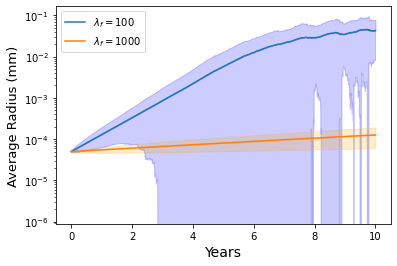

In [21]:
plt.plot(time, rad_A, label=r'$\lambda_f = 100$')
plt.fill_between(time, rad_A + rad_Astd, rad_A, alpha=0.2, color='b')
plt.fill_between(time, rad_A , rad_A - rad_Astd, alpha=0.2, color='b')

plt.plot(time, rad_B, label=r'$\lambda_f = 1000$')
plt.fill_between(time, rad_B + rad_Bstd, rad_B, alpha=0.2, color='orange')
plt.fill_between(time, rad_B , rad_B - rad_Bstd, alpha=0.2, color='orange')

plt.xlabel('Years', fontsize=14)
plt.ylabel('Average Radius (mm)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

In [22]:
inMLD_A = np.array(sim['A']['mld'] > sim['A']['z'])
inMLD_A = np.sum(inMLD_A, axis=0)

In [26]:
# sim['A']['z']
toolbox.average_parcels_output(sim['A']['z'])§a

ValueError: could not broadcast input array from shape (10000,) into shape (121,)

Text(0.5, 1.0, '-8 years with $\\lambda_f$ = 1000 days')

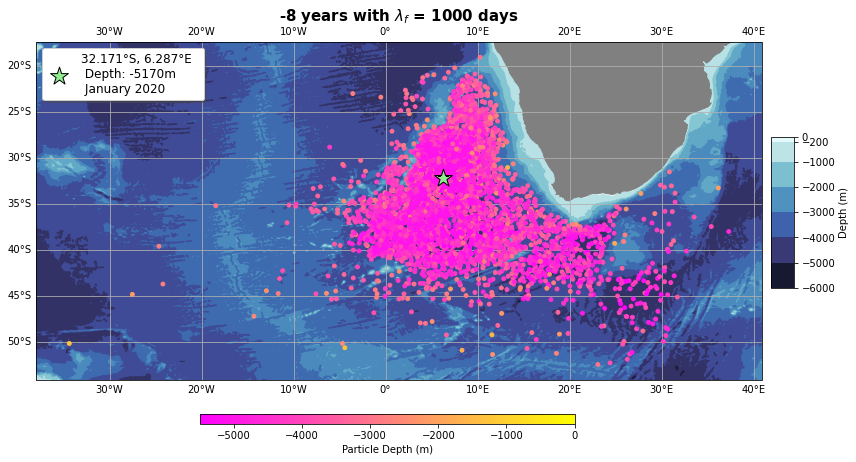

In [22]:
sim_name = 'B'
max_depth = -5500
min_depth = 0
nn = 8*365

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim[sim_name]['lon'][:,nn], sim[sim_name]['lat'][:,nn], zorder=4, 
           c=-sim[sim_name]['z'][:,nn], s=15, cmap='spring',
                vmax=max_depth, vmin=min_depth)

ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title(r'-8 years with $\lambda_f$ = 1000 days', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

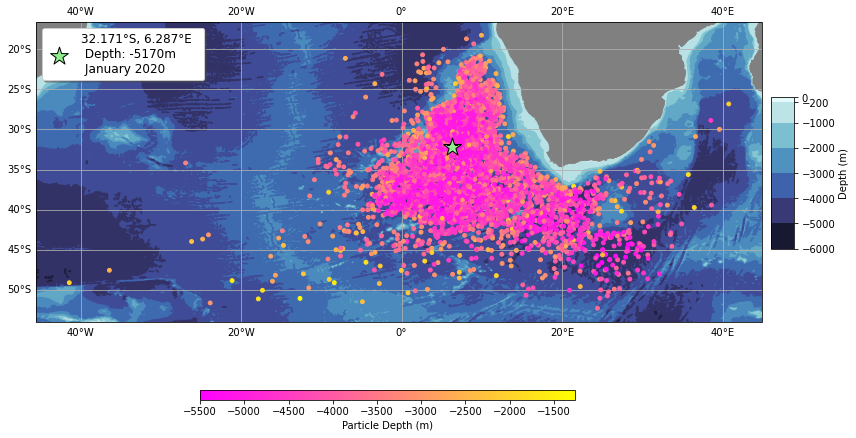

In [51]:
sim_name = 'B'
max_depth = -5500
min_depth = -sim[sim_name]['z'][:,-1].min()

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim[sim_name]['lon'][:,-1], sim[sim_name]['lat'][:,-1], zorder=4, 
           c=-sim[sim_name]['z'][:,-1], s=15, cmap='spring',
                vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
# ax.set_title('365 days no diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

# Distributions

In [14]:
sim['A']

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 3651)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    time              (traj, obs) datetime64[ns] 2019-12-31T12:00:00 ... NaT
    lat               (traj, obs) float64 -32.16 -32.13 -32.1 ... nan nan nan
    lon               (traj, obs) float64 6.289 6.328 6.369 ... nan nan nan
    z                 (traj, obs) float64 5e+03 5.015e+03 5.016e+03 ... nan nan
    cons_temperature  (traj, obs) float32 0.7251 0.7342 0.7413 ... nan nan nan
    ...                ...
    mld               (traj, obs) float32 30.64 32.95 50.49 ... nan nan nan
    Kz                (traj, obs) float32 1.482e-05 1.477e-05 ... nan nan
    radius            (traj, obs) float32 5e-08 5e-08 5e-08 ... nan nan nan
    volume            (traj, obs) float32 5.236e-22 5.236e-22 ... nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    v_s               (traj, obs) float32 0.0 1.865e-09 1.865e-09 ... nan nan
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

[]

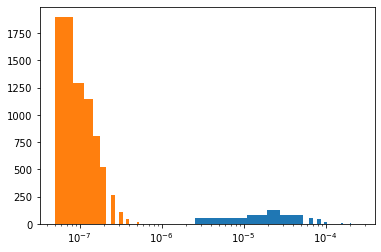

In [32]:
plt.hist(sim['A']['radius'][:,-1], bins=30)
plt.hist(sim['B']['radius'][:,-1], bins=30)
plt.semilogx()

(0.0, 3500.0)

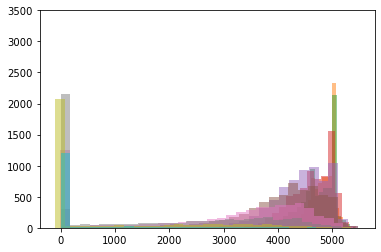

In [43]:
for i in range(0, 10):
    N = 365*i
    plt.hist(sim['A']['z'][:,N], bins=30, alpha=0.5);

plt.ylim(0, 3500)

In [34]:
sim['A']

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 3651)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    time              (traj, obs) datetime64[ns] 2019-12-31T12:00:00 ... NaT
    lat               (traj, obs) float64 -32.16 -32.13 -32.1 ... nan nan nan
    lon               (traj, obs) float64 6.289 6.328 6.369 ... nan nan nan
    z                 (traj, obs) float64 5e+03 5.015e+03 5.016e+03 ... nan nan
    cons_temperature  (traj, obs) float32 0.7251 0.7342 0.7413 ... nan nan nan
    ...                ...
    mld               (traj, obs) float32 30.64 32.95 50.49 ... nan nan nan
    Kz                (traj, obs) float32 1.482e-05 1.477e-05 ... nan nan
    radius            (traj, obs) float32 5e-08 5e-08 5e-08 ... nan nan nan
    volume            (traj, obs) float32 5.236e-22 5.236e-22 ... nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    v_s               (traj, obs) float32 0.0 1.865e-09 1.865e-09 ... nan nan
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

# Animations

In [70]:
sim_name = 'B'
max_sal, min_sal = sim['C']['abs_salinity'].max(), 32
max_temp, min_temp = 30, 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

for frame in range(0, 3650, 10):
#     print(f'{frame:03d}')
    size_point = 0.7

    fig = plt.figure(figsize=(6,8))
    gs = fig.add_gridspec(3, 2,  width_ratios=(5,5), height_ratios=(3, 3, 1),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.1, hspace=0.3)

    # Map
    ax = fig.add_subplot(gs[1, 0:2], projection=ccrs.PlateCarree())
    # ax.set_extent((-45, 46, -52, -16))
    ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5)
    gl.right_labels = False
    gl.top_labels = False
    im = ax.scatter(sim['C']['lon'][:, frame], sim[sim_name]['lat'][:, frame], c=-sim[sim_name]['z'][:, frame], s=size_point, vmax=0, vmin=-5500)

    # Depth distributions
    ax_lon = plt.subplot(gs[0, 0])
    ax_lon.grid()
    # ax_lon.set_xticklabels([])
    ax_lon.set_xlabel('Depth (m)')
    ax_lon.set_ylabel('Number of Particles')
    ax_lon.set_xlim(-5500, 0)
#     ax_lon.set_ylim(0, 15000)
    ax_lon.hist(-sim[sim_name]['z'][:, frame], bins=40)
    time_str = str(sim[sim_name]['time'][0,frame].values)[:10]
    ax_lon.set_title(time_str)

    # T-S diagram
    ax_TS = plt.subplot(gs[0, 1])
    ax_TS.scatter(sim[sim_name]['abs_salinity'][:, frame], sim[sim_name]['cons_temperature'][:, frame], s=size_point, c=-sim[sim_name]['z'][:, frame],
                 vmax=0, vmin=-5500);
    ax_TS.set_xlim(33, max_sal + 1)
    ax_TS.yaxis.tick_right()
    ax_TS.yaxis.set_label_position("right")
    cs = ax_TS.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
    cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')
    ax_TS.set_xlabel('Salinity ($‰$)')
    ax_TS.set_ylabel('Temperature[$^\circ$C]')

    # Colobar
    bar_ax = fig.add_axes([0.12, 0.17, 0.78, 0.04])
    plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Depth (m)')
    num = frame//10
    plt.savefig(f'../figs/frag100/{num:03d}', dpi=200, facecolor=(1,1,1,1))
    plt.close()